# Introduction

### This notebook is the Capstone project towards **IBM DATA SCIENCE PROFESSIONAL** course on Coursera.

This notebook is consisting of 5 parts as mentioned below in Table of content. **These parts need to be executed in sequence.**
Also some libraries are imported in each part to be sure to not miss the needed library within the part. 

<a id='itemA'></a>

# Table of Contents


<a href="#item1">PART I : Scrapping data from Wikipedia into a dataframe</a>

<a href="#item2">PART II : Analysing the distribution of the restaurants</a>

<a href="#item3">PART III :  Deep dive into the Top 10 location</a>
    
<a href="#item4">PART IV : Clustering the venues using K mean into 4 Cluster</a>
    
<a href="#item5">PART V : Finding the average cost for 2 people</a>
    
<a href="#item6">Conclusion</a>
    


<a id='item1'></a>

# PART I : Scrapping data from Wikipedia into a dataframe

<a href="#item11">1. Installing required beautifulsoup and urllib</a>  

<a href="#item12">2. Copying data from url</a>  

<a href="#item13">3. Find all tables and go through rows to find the details of column into 3 lists</a>  

<a href="#item14">4. Read CSV file containing pincodes (zipcodes) and location names , create cleaned dataframe</a>  

<a href="#item15">5. Read Restaurants dataset from Zomato (which was prefiltered for Bangalore restaurants , cafe , bakery etc),create cleaned dataframe</a>  


In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

print('Libraries imported.')

Libraries imported.


### Scraping data from Wikipedia

<a href="#item11">

#### 1. Installing required beautifulsoup and urllib

In [2]:
# import the library we use to open URLs
import urllib.request

#installing beautisoup
!pip install bs4

print("Install done")

     |████████████████████████████████| 122kB 7.3MB/s eta 0:00:01
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/a0/b0/b2/4f80b9456b87abedbc0bf2d52235414c3467d8889be38dd472
Successfully built bs4
Install done


<a href="#item12">

#### 2. Copying data from url

In [3]:
# import the BeautifulSoup library so we can parse HTML and XML documents
from bs4 import BeautifulSoup

import requests

import pandas as pd

<a href="#item13">

#### 3. Find all tables and go through rows to find the details of column into 3 lists

**To parse the wikipedia page and collect the neighbourhood names in a dataframe**

In [4]:
#Request the webpage and use beautifulsoup html parse method
wiki = requests.get('https://en.wikipedia.org/wiki/List_of_neighbourhoods_in_Bangalore')
soup = BeautifulSoup(wiki.content, 'html.parser')

# Get all the tables
tables = soup.find_all('table',class_="wikitable")

# extract the column names
column_names = [item.get_text() for item in tables[0].find_all('th')]

# extract the content
contents = [item.get_text() for item in tables[0].find_all('td')]

# put all the content into a list
values_list = []

#find all regions
Regions = soup.find_all('h2')
for c in Regions:
    table = c.find_next_sibling("table")
    if table is not None: 
        for item in table.select('tr')[1:]:
            values = [e.get_text() for e in item.select('td')]
            values = [c.text]+values
            values_list.append(values)

header_list = ['Region','location','Image','Summary']

# put all the data into a dataframe
df = pd.DataFrame(values_list, columns=header_list)

#removes column which contains a image and summary
df.drop(['Image','Summary'], axis=1, inplace=True)
print(df.shape)
df.head()

(65, 2)


,Region,location
0,Central[edit],Cantonment area\n
1,Central[edit],Domlur\n
2,Central[edit],Indiranagar\n
3,Central[edit],Jeevanbheemanagar\n
4,Central[edit],Malleswaram\n


In [5]:
#remove the [edit] and tab \n from the parsed dataframe
df['location'] = df['location'].str[:-1]
df['Region'] = df['Region'].str[:-6]
df.head()

,Region,location
0,Central,Cantonment area
1,Central,Domlur
2,Central,Indiranagar
3,Central,Jeevanbheemanagar
4,Central,Malleswaram


In [6]:
df_list = df.groupby('Region').count().reset_index()
df_list

,Region,location
0,Central,11
1,Eastern,8
2,North-Eastern,7
3,Northern,8
4,South-Eastern,7
5,Southern,8
6,Southern suburbs,6
7,Western,10


<a href="#item14">

### 4. Read CSV file containing pincodes (zipcodes) and location names

**Read CSV file and store to dataframe**

In [7]:
# reads your cvs file into a DataFrame
pin_geo = pd.read_csv("IN_geo.txt",header= None , error_bad_lines=False , sep ='\t' , skipinitialspace = True)
pin_geo.columns=['Country','pincode','location','State','unwanted','City','unwanted3','unwanted4','unwanted5','Latitude','Longitude','unwanted6']
print(pin_geo.shape)
pin_geo.head()

(155570, 12)


,Country,pincode,location,State,unwanted,City,unwanted3,unwanted4,unwanted5,Latitude,Longitude,unwanted6
0,IN,744301,Kakana,Andaman & Nicobar Islands,1,Nicobar,638.0,Carnicobar,NaN,9.1167,92.8000,4
1,IN,744301,Sawai,Andaman & Nicobar Islands,1,Nicobar,638.0,Carnicobar,NaN,7.5166,93.6031,4
2,IN,744301,Lapathy,Andaman & Nicobar Islands,1,Nicobar,638.0,Carnicobar,NaN,9.1833,92.7667,3
3,IN,744301,Mus,Andaman & Nicobar Islands,1,Nicobar,638.0,Carnicobar,NaN,9.2333,92.7833,4
4,IN,744301,Carnicobar,Andaman & Nicobar Islands,1,Nicobar,638.0,Carnicobar,NaN,9.1833,92.7667,3


**Clean up the dataframe to have only required columns and details for Bangalore / Bengaluru**

In [8]:
#clean data and retain only bangalore data

# get index of the rows with  city not equal to "Bengaluru"
indexNames = pin_geo[pin_geo['City'] !="Bengaluru"].index

# Delete the above identified rows
pin_geo.drop(indexNames , inplace=True)
pin_geo.reset_index(drop=True, inplace=True)

#drop the unwanted columns (lat and lng also due to their inaccuracy)
pin_geo.drop(['unwanted','unwanted3','unwanted4','unwanted5','unwanted6','Latitude','Longitude'], axis=1, inplace=True)
pin_geo.head(50) # to see if the data contains some random string characters

,Country,pincode,location,State,City
0,IN,560001,Vasanthanagar,Karnataka,Bengaluru
1,IN,560001,Legislators Home,Karnataka,Bengaluru
2,IN,560001,Vidhana Soudha,Karnataka,Bengaluru
3,IN,560001,Mahatma Gandhi Road,Karnataka,Bengaluru
4,IN,560001,CMM Court Complex,Karnataka,Bengaluru
5,IN,560001,Rajbhavan (Bangalore),Karnataka,Bengaluru
6,IN,560001,Dr. Ambedkar Veedhi,Karnataka,Bengaluru
7,IN,560001,Bangalore G.P.O.,Karnataka,Bengaluru
8,IN,560001,HighCourt,Karnataka,Bengaluru
9,IN,560002,Bangalore City,Karnataka,Bengaluru


In [9]:
#replacing the H.O and SO with blank
pin_geo['location'] = pin_geo['location'].str.replace(" H.O","")
pin_geo['location'] = pin_geo['location'].str.replace(" SO","")

pin_geo.head(25)

,Country,pincode,location,State,City
0,IN,560001,Vasanthanagar,Karnataka,Bengaluru
1,IN,560001,Legislators Home,Karnataka,Bengaluru
2,IN,560001,Vidhana Soudha,Karnataka,Bengaluru
3,IN,560001,Mahatma Gandhi Road,Karnataka,Bengaluru
4,IN,560001,CMM Court Complex,Karnataka,Bengaluru
5,IN,560001,Rajbhavan (Bangalore),Karnataka,Bengaluru
6,IN,560001,Dr. Ambedkar Veedhi,Karnataka,Bengaluru
7,IN,560001,Bangalore G.P.O.,Karnataka,Bengaluru
8,IN,560001,HighCourt,Karnataka,Bengaluru
9,IN,560002,Bangalore City,Karnataka,Bengaluru


In [10]:
#convert location in  dataframe to type string and remove any white spaces at start or end
pin_geo['location'] = pin_geo['location'].astype(str)
pin_geo['location'].apply(lambda x: x.rstrip())
pin_geo.head()

,Country,pincode,location,State,City
0,IN,560001,Vasanthanagar,Karnataka,Bengaluru
1,IN,560001,Legislators Home,Karnataka,Bengaluru
2,IN,560001,Vidhana Soudha,Karnataka,Bengaluru
3,IN,560001,Mahatma Gandhi Road,Karnataka,Bengaluru
4,IN,560001,CMM Court Complex,Karnataka,Bengaluru


In [11]:
pin_geo.shape

(266, 5)

<a href="#item15">

### 5. Read Restaurants dataset from Zomato (which was prefiltered for Bangalore restaurants , cafe , bakery etc)

In [12]:
zomato_new = pd.read_csv("zomato_new.csv", header=0,index_col =0,error_bad_lines=False , skipinitialspace = True)
print(zomato_new.shape)
zomato_new.head()

(51717, 12)


,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(city)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Banashankari


In [13]:
zomato_new.dtypes

address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
listed_in(city)                object
dtype: object

#### a) change categorical data online_order and book_table to numeric values

In [14]:
#change categorical data in online_order and book_table to numeric values
from sklearn import preprocessing
online_order = preprocessing.LabelEncoder()
online_order.fit(['Yes','No'])
zomato_new[['online_order']] = online_order.transform(zomato_new[['online_order']])
zomato_new[['book_table']] = online_order.transform(zomato_new[['book_table']])
zomato_new.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(city)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,1,1,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,1,0,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,1,0,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,0,0,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,0,0,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Banashankari


In [15]:
#remove whitespaces at end
zomato_new.columns = zomato_new.columns.str.rstrip()
zomato_new.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(city)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,1,1,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,1,0,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,1,0,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,0,0,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,0,0,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Banashankari


#### b)  Replacing the values in column "location" with column "listed_in(city)" when first column has names as region names

In [16]:
q =0

for q in range(len(zomato_new)):
    if zomato_new.iloc[q,6] == "South Bangalore" or zomato_new.iloc[q,6] == "North Bangalore" or zomato_new.iloc[q,6] == "Central Bangalore" or zomato_new.iloc[q,6] == "West Bangalore" or zomato_new.iloc[q,6] == "Bangalore" or zomato_new.iloc[q,6] == "East Bangalore":
        zomato_new.iloc[q,6]= zomato_new.iloc[q,11]
    
print ("Done")

Done


#### c) Get a dataset which contains alternative spelling for locations

In [17]:
correction = pd.read_excel("correction.xlsx", header=0,index_col = None,error_bad_lines=False , skipinitialspace = True)
correction.columns =['location','correction']
print(correction.shape)
correction.head()

(71, 2)


,location,correction
0,Mysore Road,Deepanjalinagar
1,Rajarajeshwari Nagar,Rajarajeshwarinagar
2,Vijay Nagar,Vijayanagar (Bangalore)
3,Uttarahalli,Chikkalasandra
4,JP Nagar,J P Nagar


#### d) Change locations names to alternative spellings to enable merge of dataframes later

In [18]:
#to replace the location names with location names(different spelling) as per pincode file
k =0
l=0

for k in range(len(zomato_new)):
    for l in range(len(correction)):
        if zomato_new.iloc[k,6] == correction.iloc[l,0]:
            zomato_new.iloc[k,6] = correction.iloc[l,1]
            
print ("Done")

Done


#### e) Merge the dataframes to have a list of restaurants with its details and additionally the pincodes from the second dataframe

In [19]:
df_all = zomato_new.join(pin_geo.set_index('location'),on='location')
df_all.head(5)

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(city),Country,pincode,State,City
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,1,1,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Banashankari,IN,560050.0,Karnataka,Bengaluru
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,1,0,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Banashankari,IN,560050.0,Karnataka,Bengaluru
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,1,0,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Banashankari,IN,560050.0,Karnataka,Bengaluru
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,0,0,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Banashankari,IN,560050.0,Karnataka,Bengaluru
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,0,0,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Banashankari,IN,560004.0,Karnataka,Bengaluru


In [20]:
#check if we have columns with Null or NaN data
print (df_all.apply(lambda x: x.isnull().value_counts()))

       address     name  online_order  book_table   rate    votes  location  \
False  51717.0  51717.0       51717.0     51717.0  43942  51717.0     51696   
True       NaN      NaN           NaN         NaN   7775      NaN        21   

       rest_type  dish_liked  cuisines  approx_cost(for two people)  \
False      51490       23639     51672                        51371   
True         227       28078        45                          346   

       listed_in(city)  Country  pincode  State   City  
False          51717.0    51696    51696  51696  51696  
True               NaN       21       21     21     21  


In [21]:
#dropping rows which have location as NaN
df_all.dropna(subset=['location'],inplace=True)


In [22]:
#rechecking if the rows are removed
print (df_all.apply(lambda x: x.isnull().value_counts()))

       address     name  online_order  book_table   rate    votes  location  \
False  51696.0  51696.0       51696.0     51696.0  43942  51696.0   51696.0   
True       NaN      NaN           NaN         NaN   7754      NaN       NaN   

       rest_type  dish_liked  cuisines  approx_cost(for two people)  \
False      51490       23639     51672                        51371   
True         206       28057        24                          325   

       listed_in(city)  Country  pincode    State     City  
False          51696.0  51696.0  51696.0  51696.0  51696.0  
True               NaN      NaN      NaN      NaN      NaN  


In [23]:
df_all.shape

(51696, 16)

Now we have a list of restaurants in Bengaluru and their associated details as below :

1. address - address of the restaurant
2. name - Name of the restaurant
3. online_order - if the restaurant accepts online ordering (1- yes , 0- No)
4. book_table - if the restaurant accepts table booking (1- yes , 0- No)
5. rate - rating
6. votes - no. of votes
7. location - location (Neighbourhood)
8. rest_type - type of the restaurant
9. dish_liked - dishes disliked by people
10. cuisine - curisine served
11. approx_cost(for two people)
12. listed_in(city)
13. Country
14. pincode
15. State
16. City

<a href="#itemA">**RETURN TO TABLE OF CONTENT**</a>

<a id='item2'></a>

# PART II : Analysing the distribution of the restaurants



<a href="#item21">1. Find locality with most restaurants</a>  

<a href="#item22">2. Find the top 10 locations in terms of number of restaurants</a>  

<a href="#item23">3. Creating Choropleth map to see the distribution of restaurants within the city</a>  



<a id='item21'></a>

### 1. Find locality with most restaurants

In [24]:
#blank dataframe
rest_count = pd.DataFrame(columns= ['Casual Dining','Fine Dining','Microbrewery','Lounge'])

#search keywords
key = ['Casual Dining','Fine Dining','Microbrewery','Lounge']

for i in range(len(key)):
    rest_count[key[i]] = df_all[df_all.rest_type.str.contains(key[i],case=False, na=False)].groupby(['location']).size()
    
rest_count.rename(columns= {'Location':'Location','Casual Dining' : 'Casual_Dining','Fine Dining':'Fine_Dining','Microbrewery':'Microbrewery','Lounge':'Lounge'})

rest_count.fillna(0, inplace= True)
rest_count['Fine Dining'] = rest_count['Fine Dining'].astype(int)
rest_count['Microbrewery'] = rest_count['Microbrewery'].astype(int)
rest_count['Lounge'] = rest_count['Lounge'].astype(int)
rest_count = rest_count.reset_index()
rest_count.head()

,location,Casual Dining,Fine Dining,Microbrewery,Lounge
0,Adugodi,37,0,0,0
1,Arabic College,76,0,0,0
2,Ashoknagar (Bangalore),1081,47,65,86
3,Banashankari,170,0,0,4
4,Banaswadi,285,0,0,0


In [25]:
#get data type of columns
rest_count.dtypes

location         object
Casual Dining     int64
Fine Dining       int64
Microbrewery      int64
Lounge            int64
dtype: object

In [26]:
print("Number of Casual dining restaurants is " + (rest_count['Casual Dining'].sum()).astype(str))
print("Number of Fine dining restaurants is " + (rest_count['Fine Dining'].sum()).astype(str))
print("Number of Microbrewerys is " + (rest_count['Microbrewery'].sum()).astype(str))
print("Number of Lounges is " + (rest_count['Lounge'].sum()).astype(str))

Number of Casual dining restaurants is 13057
Number of Fine dining restaurants is 405
Number of Microbrewerys is 390
Number of Lounges is 555


|Resturant Type  |Total Number of restaurants  
--- |---  
Casual Dining | 13057
Fine Dining | 405  
Micropbrewery | 390  
Lounge | 555  


<a id='item22'></a>

### 2. Find the top 10 locations in terms of number of restaurants

#### a) sorting the data

In [27]:
# sorting the list and get the top 10 locations
rest_sorted =rest_count.sort_values('Casual Dining', ascending= False)
top_10 = rest_sorted.head(10)
top_10

,location,Casual Dining,Fine Dining,Microbrewery,Lounge
30,Koramangala VI Bk,1443,0,82,110
2,Ashoknagar (Bangalore),1081,47,65,86
33,Madivala,766,0,17,0
56,Whitefield,737,26,27,37
21,Indiranagar (Bangalore),701,5,12,35
22,J P Nagar,683,3,28,12
19,HSR Layout,630,0,0,26
24,Jayanagar,546,0,10,9
15,Doddanekkundi,472,11,5,8
45,Richmond Town,453,88,33,36


#### b) plot the data into a horizontal bar chart

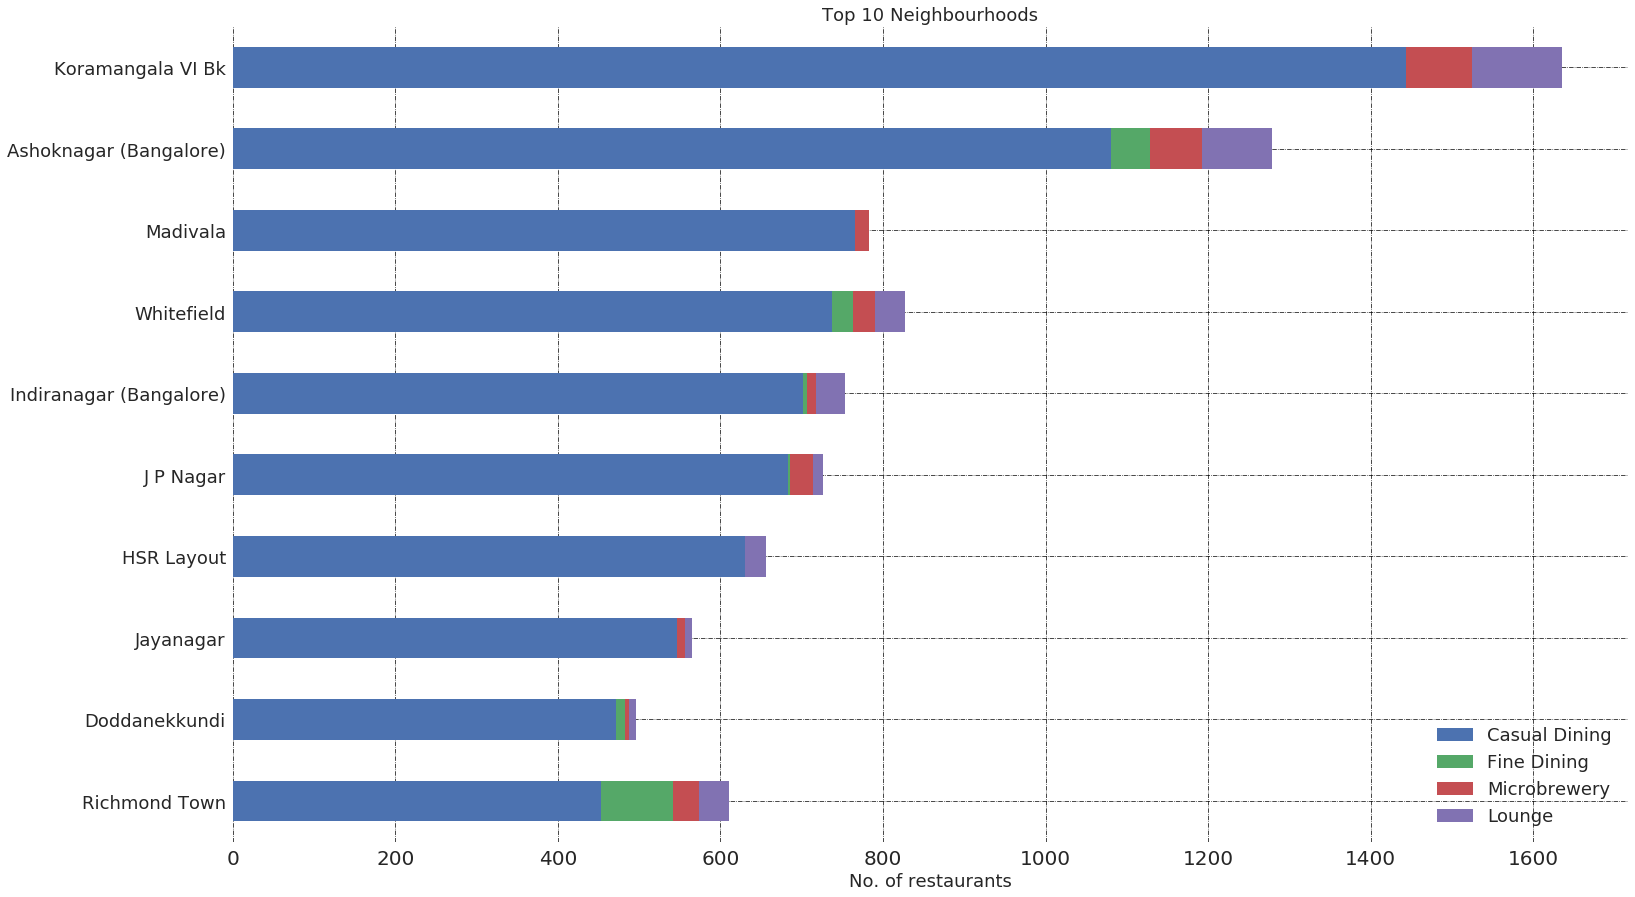

In [28]:
#ploting the top 10 neighbourhoods with heighest casual dining number at top.    

# we are using the inline backend
%matplotlib inline 
import matplotlib.pyplot as plt

plt.style.use('seaborn')
plt.rcParams['axes.facecolor'] = 'white'

top_10 = top_10.sort_values('Casual Dining', ascending= True)

ax = top_10.plot(kind="barh" , stacked=True , figsize=(25, 15))


ax.set_yticklabels(top_10['location'] , fontsize=18)
#ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('No. of restaurants', fontsize=18)
ax.set_title('Top 10 Neighbourhoods', fontsize=18)
plt.grid(color='black', linestyle='-.', linewidth=0.7)
plt.legend(facecolor='white', framealpha= 0 , prop={"size":18} , loc = 4)
plt.xticks(fontsize=20)
ax.titlesize: 16
plt.savefig('top_10_nh.png')
plt.show()



<a id='item23'></a>

### 3. Creating Choropleth map to see the distribution of restaurants within the city

#### a) Instal libraries

In [29]:
#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't install before
!pip install folium
import folium # map rendering library


!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim
print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-1.22.0               |     pyh9f0ad1d_0          63 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          97 KB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-1.22.0-pyh9f0ad1d_0



geopy-1.22.0         | 63 KB     | ##################################### | 100% 
geographiclib-1.50   | 34 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: 

#### b) Prepare data for plotting

In [30]:
#Now add the pincode details to the list of locations and number of different type of restaurants
df_all_nh = rest_sorted.join(pin_geo.set_index('location'),on='location')
df_all_nh.head()

,location,Casual Dining,Fine Dining,Microbrewery,Lounge,Country,pincode,State,City
30,Koramangala VI Bk,1443,0,82,110,IN,560095,Karnataka,Bengaluru
2,Ashoknagar (Bangalore),1081,47,65,86,IN,560050,Karnataka,Bengaluru
33,Madivala,766,0,17,0,IN,560068,Karnataka,Bengaluru
56,Whitefield,737,26,27,37,IN,560066,Karnataka,Bengaluru
21,Indiranagar (Bangalore),701,5,12,35,IN,560038,Karnataka,Bengaluru


In [31]:
print (df_all_nh.apply(lambda x: x.isnull().value_counts()))

       location  Casual Dining  Fine Dining  Microbrewery  Lounge  Country  \
False        59             59           59            59      59       59   

       pincode  State  City  
False       59     59    59  


#### c) Get dataset of geo coordinates for each location (Read CSV)

In [32]:

ammending_geo = pd.read_excel("ammend.xlsx", header=0,index_col =0,error_bad_lines=False , skipinitialspace = True)
ammending_geo.columns =('location' , 'Latitude','Longitude')
ammending_geo.head()

,location,Latitude,Longitude
Index,,,
0,Adugodi,12.942847,77.610416
1,Arabic College,13.030009,77.620866
2,Ashoknagar (Bangalore),12.979120,77.591300
3,Banashankari,12.915221,77.573598
4,Banaswadi,13.014162,77.651854


#### d) add the geo coordinates to the dataframe with locations , number of restaurants based on type


In [33]:
#joining two dataframes with lcoations are matching column values
df_test = df_all_nh.join(ammending_geo.set_index('location'),on='location')
df_all_nh = df_test
df_all_nh.head()

,location,Casual Dining,Fine Dining,Microbrewery,Lounge,Country,pincode,State,City,Latitude,Longitude
30,Koramangala VI Bk,1443,0,82,110,IN,560095,Karnataka,Bengaluru,12.931500,77.630000
2,Ashoknagar (Bangalore),1081,47,65,86,IN,560050,Karnataka,Bengaluru,12.979120,77.591300
33,Madivala,766,0,17,0,IN,560068,Karnataka,Bengaluru,12.920694,77.614421
56,Whitefield,737,26,27,37,IN,560066,Karnataka,Bengaluru,12.969637,77.749745
21,Indiranagar (Bangalore),701,5,12,35,IN,560038,Karnataka,Bengaluru,12.981334,77.637282


#### e) Plot the Choropleth

In [34]:
# download countries geojson file
!wget --quiet https://raw.githubusercontent.com/openbangalore/bangalore/master/bangalore/GIS/bangalore_pincode.json
    
print('GeoJSON file downloaded!')


GeoJSON file downloaded!


In [35]:
# get the geocordinates of Bangalore
address = 'Bangalore'

geolocator = Nominatim(user_agent="Bangalore")
location = geolocator.geocode(address)
blrlatitude = location.latitude
blrlongitude = location.longitude
print('The geograpical coordinate of Bangalore are {}, {}.'.format(blrlatitude, blrlongitude))

The geograpical coordinate of Bangalore are 12.9791198, 77.5912997.


In [36]:
Blr_geo = r'bangalore_pincode.json' # geojson file

# create a plain world map
Blr_map = folium.Map(location=[blrlatitude, blrlongitude], zoom_start=11.5, tiles='Mapbox Control Room')

In [37]:
# generate choropleth map using the total immigration of each country to Canada from 1980 to 2013

df_all_nh['pincode'] =df_all_nh['pincode'].astype(str)

Blr_map.choropleth(
    geo_data=Blr_geo,
    data=df_all_nh,
    columns=['pincode', 'Casual Dining'],
    key_on='feature.properties.pincode',
    fill_color='Blues', 
    fill_opacity=0.7, 
    line_opacity=0.5,
    legend_name='Number of restaurants'
      
)

feature_group = folium.FeatureGroup("Locations")

for i in range(len(df_all_nh)):
    feature_group.add_child(folium.Marker(location = [df_all_nh.iloc[i,9],df_all_nh.iloc[i,10]], popup =df_all_nh.iloc[i,0]))

Blr_map.add_child(feature_group)

# display map
Blr_map



<a id='item3'></a>

<a href="#itemA">**RETURN TO TABLE OF CONTENT**</a>

# PART III :  Deep dive into the Top 10 location



<a href="#item31">1. Install libraries</a>  

<a href="#item32">2. Filter the complete list for restaurants in the top 10 locations only</a>  

<a href="#item33">3. Foursquare query to get top 10 locations for venues in the place</a>  



<a id='item31'></a>

### 1. Install libraries

In [38]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis

print('Libraries imported.')

Libraries imported.


<a id='item32'></a>

### 2. Filter the complete list for restaurants in the top 10 locations only

In [39]:
#get the Df-all list with restaurants location matching top 10 locations
T = df_all_nh.sort_values('Casual Dining', ascending= False).head(10)
neighbourhood_rest =df_all[df_all['location'].isin([T.iloc[k,0] for k in range(0,10)])]

#filter out only restaurants with type 'Casual Dining','Fine Dining','Microbrewery','Lounge'
neighbourhood_filtered = neighbourhood_rest[neighbourhood_rest['rest_type'].str.contains('Casual Dining'or'Fine Dining' or'Microbrewery'or'Lounge',case=False ,na=False)]
neighbourhood_filtered = neighbourhood_filtered.join(ammending_geo.set_index('location'),on='location')
neighbourhood_filtered.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(city),Country,pincode,State,City,Latitude,Longitude
38,"4, Opposite NMKRV College, 21st C Cross Road, ...",Empire Restaurant,1,0,4.4/5,4884,Jayanagar,Casual Dining,"Chicken Tikka Masala, Mutton Keema Dosa, Mutto...","North Indian, Mughlai, South Indian, Chinese",750,Banashankari,IN,560041.0,Karnataka,Bengaluru,12.929273,77.582423
53,"178, Next To Old KEB Office, 8th F Main Road, ...",Biryanis And More,1,0,4.0/5,618,Jayanagar,Casual Dining,"Prawn Biryani, Dragon Chicken, Chicken Boneles...","Biryani, North Indian, Chinese, Andhra, South ...",750,Banashankari,IN,560041.0,Karnataka,Bengaluru,12.929273,77.582423
86,"52, 1st Floor, 33rd Cross, 4th Block, Jayanaga...",Meghana Foods,1,0,4.4/5,4401,Jayanagar,Casual Dining,"Chicken Boneless Biryani, Hyderabadi Biryani, ...","Biryani, North Indian, Chinese",600,Banashankari,IN,560041.0,Karnataka,Bengaluru,12.929273,77.582423
148,"155, 43rd Cross Road, 8th Block, Jayanagar, Ba...",Sri Udupi Food Hub,1,1,4.1/5,175,Jayanagar,Casual Dining,"Filter Coffee, Masala Dosa, Idli, Vada","South Indian, North Indian, Chinese, Beverages",500,Banashankari,IN,560041.0,Karnataka,Bengaluru,12.929273,77.582423
162,"28-29, 3rd Block, 9th Main Road, Jayanagar, Ba...",Canton,1,0,3.6/5,195,Jayanagar,Casual Dining,"Roast Pork, Tai Pai Chicken, Beer, Sweet Corn ...","Chinese, Seafood, Biryani",800,Banashankari,IN,560041.0,Karnataka,Bengaluru,12.929273,77.582423


In [40]:
neighbourhood_filtered.shape

(7512, 18)

<a id='item33'></a>

<a id='item3'></a>


### 3. Foursquare query to get top 10 locations for venues in the place

#### a) Creating a dataframe with only top 10 lcoation and their geo coordinates

In [41]:
# get coordinates and names of top 10 neighbourhood
df_nh = df_all_nh.sort_values('Casual Dining', ascending= False).head(10)
df_nh.head(10)

,location,Casual Dining,Fine Dining,Microbrewery,Lounge,Country,pincode,State,City,Latitude,Longitude
30,Koramangala VI Bk,1443,0,82,110,IN,560095,Karnataka,Bengaluru,12.931500,77.630000
2,Ashoknagar (Bangalore),1081,47,65,86,IN,560050,Karnataka,Bengaluru,12.979120,77.591300
33,Madivala,766,0,17,0,IN,560068,Karnataka,Bengaluru,12.920694,77.614421
56,Whitefield,737,26,27,37,IN,560066,Karnataka,Bengaluru,12.969637,77.749745
21,Indiranagar (Bangalore),701,5,12,35,IN,560038,Karnataka,Bengaluru,12.981334,77.637282
22,J P Nagar,683,3,28,12,IN,560078,Karnataka,Bengaluru,12.909694,77.586607
19,HSR Layout,630,0,0,26,IN,560102,Karnataka,Bengaluru,12.911623,77.638862
24,Jayanagar,546,0,10,9,IN,560041,Karnataka,Bengaluru,12.929273,77.582423
15,Doddanekkundi,472,11,5,8,IN,560037,Karnataka,Bengaluru,12.979357,77.694669
45,Richmond Town,453,88,33,36,IN,560025,Karnataka,Bengaluru,12.962692,77.604160


#### b) Get coordinates of Bangalore

In [42]:
address = 'Bangalore'

geolocator = Nominatim(user_agent="Bangalore")
location = geolocator.geocode(address)
blrlatitude = location.latitude
blrlongitude = location.longitude
print('The geograpical coordinate of Bangalore are {}, {}.'.format(blrlatitude, blrlongitude))

The geograpical coordinate of Bangalore are 12.9791198, 77.5912997.


#### c) Credentials for Foursquare requests

In [118]:
CLIENT_ID = 'client ID' # your Foursquare ID
CLIENT_SECRET = 'client secret' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: client ID
CLIENT_SECRET:client secret


In [44]:
# define radius and limit of the request
radius = 10000
LIMIT =100

Collecting the categories of the top 100 venues

#### d) Creating dataframe with top 100 Venues and categories

In [45]:
#define function to make the API request for each location in above dataframe
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['location', 
                  'Latitude', 
                  'Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [46]:
#API query for each location in the top 10 list based on their geocodes
Bangalore_Venues = getNearbyVenues(names=df_nh['location'],
                                   latitudes=df_nh['Latitude'],
                                   longitudes=df_nh['Longitude']
                                  )

Koramangala VI Bk
Ashoknagar (Bangalore)
Madivala
Whitefield
Indiranagar (Bangalore)
J P Nagar
HSR Layout
Jayanagar
Doddanekkundi
Richmond Town


In [47]:
print(Bangalore_Venues.shape)
Bangalore_Venues.head()

(290, 7)


,location,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Koramangala VI Bk,12.9315,77.63,Serafina Bangalore,12.932808,77.631186,Italian Restaurant
1,Koramangala VI Bk,12.9315,77.63,Banjara Melting Pot,12.931328,77.632820,Indian Restaurant
2,Koramangala VI Bk,12.9315,77.63,Natural's,12.930501,77.633056,Ice Cream Shop
3,Koramangala VI Bk,12.9315,77.63,A Cafe,12.929675,77.630717,Bakery
4,Koramangala VI Bk,12.9315,77.63,Third Wave Coffee Roasters,12.934728,77.629461,Coffee Shop


#### e) Analysing each location´s top 100 venues

In [48]:
# one hot encoding
Bangalore_onehot = pd.get_dummies(Bangalore_Venues[['Venue Category']], prefix="", prefix_sep="")

# add location column back to dataframe
Bangalore_onehot['location'] = Bangalore_Venues['location'] 

# move neighbourhood column to the first column
fixed_columns = [Bangalore_onehot.columns[-1]] + list(Bangalore_onehot.columns[:-1])
Bangalore_onehot = Bangalore_onehot[fixed_columns]

Bangalore_onehot.head()

,location,Accessories Store,Andhra Restaurant,Asian Restaurant,BBQ Joint,Bakery,Bar,Beer Garden,Bengali Restaurant,Bistro,Bookstore,Boutique,Breakfast Spot,Brewery,Burger Joint,Café,Candy Store,Capitol Building,Chettinad Restaurant,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,Cupcake Shop,Department Store,Dessert Shop,Diner,Donut Shop,Eastern European Restaurant,Electronics Store,Farmers Market,Fast Food Restaurant,Flower Shop,Food Stand,Fried Chicken Joint,Garden,Gastropub,General Entertainment,Grocery Store,Gym,Gym / Fitness Center,Health Food Store,Hockey Arena,Hotel,Hotel Bar,Hotel Pool,Hyderabadi Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Italian Restaurant,Juice Bar,Kerala Restaurant,Liquor Store,Lounge,Market,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Motorcycle Shop,Movie Theater,Multiplex,North Indian Restaurant,Park,Performing Arts Venue,Pharmacy,Pizza Place,Pub,Punjabi Restaurant,Restaurant,Sandwich Place,Seafood Restaurant,Shopping Mall,Shopping Plaza,Snack Place,Soccer Field,South Indian Restaurant,Sports Bar,Steakhouse,Swiss Restaurant,Tea Room,Turkish Restaurant,Vegetarian / Vegan Restaurant,Women's Store,Yoga Studio
0,Koramangala VI Bk,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Koramangala VI Bk,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Koramangala VI Bk,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Koramangala VI Bk,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Koramangala VI Bk,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [49]:
for col in Bangalore_onehot.columns: 
    print(col) 


location
Accessories Store
Andhra Restaurant
Asian Restaurant
BBQ Joint
Bakery
Bar
Beer Garden
Bengali Restaurant
Bistro
Bookstore
Boutique
Breakfast Spot
Brewery
Burger Joint
Café
Candy Store
Capitol Building
Chettinad Restaurant
Chinese Restaurant
Clothing Store
Cocktail Bar
Coffee Shop
Cupcake Shop
Department Store
Dessert Shop
Diner
Donut Shop
Eastern European Restaurant
Electronics Store
Farmers Market
Fast Food Restaurant
Flower Shop
Food Stand
Fried Chicken Joint
Garden
Gastropub
General Entertainment
Grocery Store
Gym
Gym / Fitness Center
Health Food Store
Hockey Arena
Hotel
Hotel Bar
Hotel Pool
Hyderabadi Restaurant
Ice Cream Shop
Indian Restaurant
Indie Movie Theater
Italian Restaurant
Juice Bar
Kerala Restaurant
Liquor Store
Lounge
Market
Mediterranean Restaurant
Mexican Restaurant
Middle Eastern Restaurant
Mobile Phone Shop
Motorcycle Shop
Movie Theater
Multiplex
North Indian Restaurant
Park
Performing Arts Venue
Pharmacy
Pizza Place
Pub
Punjabi Restaurant
Restaurant
Sandwi

#### f) Group rows by location and by taking the mean of the frequency of occurrence of each category

In [50]:
Bangalore_grouped = Bangalore_onehot.groupby('location').mean().reset_index()
print(Bangalore_grouped.shape)
Bangalore_grouped.head()

(10, 86)


,location,Accessories Store,Andhra Restaurant,Asian Restaurant,BBQ Joint,Bakery,Bar,Beer Garden,Bengali Restaurant,Bistro,Bookstore,Boutique,Breakfast Spot,Brewery,Burger Joint,Café,Candy Store,Capitol Building,Chettinad Restaurant,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,Cupcake Shop,Department Store,Dessert Shop,Diner,Donut Shop,Eastern European Restaurant,Electronics Store,Farmers Market,Fast Food Restaurant,Flower Shop,Food Stand,Fried Chicken Joint,Garden,Gastropub,General Entertainment,Grocery Store,Gym,Gym / Fitness Center,Health Food Store,Hockey Arena,Hotel,Hotel Bar,Hotel Pool,Hyderabadi Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Italian Restaurant,Juice Bar,Kerala Restaurant,Liquor Store,Lounge,Market,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Motorcycle Shop,Movie Theater,Multiplex,North Indian Restaurant,Park,Performing Arts Venue,Pharmacy,Pizza Place,Pub,Punjabi Restaurant,Restaurant,Sandwich Place,Seafood Restaurant,Shopping Mall,Shopping Plaza,Snack Place,Soccer Field,South Indian Restaurant,Sports Bar,Steakhouse,Swiss Restaurant,Tea Room,Turkish Restaurant,Vegetarian / Vegan Restaurant,Women's Store,Yoga Studio
0,Ashoknagar (Bangalore),0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.2,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.2,0.000000,0.0,0.000000,0.000000,0.000000,0.200000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.200000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0
1,Doddanekkundi,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.076923,0.000000,0.153846,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.076923,0.0,0.000000,0.076923,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.153846,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.076923,0.076923,0.076923,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.076923,0.076923,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.076923,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0
2,HSR Layout,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.027027,0.108108,0.0,0.0,0.027027,0.000000,0.000000,0.000000,0.054054,0.000000,0.027027,0.0,0.000000,0.027027,0.0,0.000000,0.054054,0.000000,0.0,0.027027,0.000000,0.0,0.0,0.027027,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.054054,0.189189,0.0,0.0,0.0,0.0,0.054054,0.027027,0.0,0.027027,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.027027,0.0,0.000000,0.0,0.027027,0.027027,0.027027,0.000000,0.027027,0.027027,0.0,0.0,0.054054,0.000000,0.027027,0.000000,0.027027,0.0,0.0,0.000000,0.000000,0.0,0.0
3,Indiranagar (Bangalore),0.017857,0.053571,0.0,0.0,0.035714,0.035714,0.0,0.017857,0.0,0.0,0.0,0.017857,0.017857,0.017857,0.089286,0.0,0.0,0.000000,0.035714,0.000000,0.017857,0.000000,0.017857,0.035714,0.0,0.017857,0.000000,0.0,0.000000,0.000000,0.071429,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.017857,0.0,0.0,0.000000,0.0,0.0,0.000000,0.017857,0.196429,0.0,0.0,0.0,0.0,0.017857,0.000000,0.0,0.000000,0.017857,0.017857,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.035714,0.053571,0.017857,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.017857,0.000000,0.000000,0.000000,0.0,0.0,0.017857,0.071429,0.0,0.0
4,J P Nagar,0.000000,0.000000,0.0,0.0,0.038462,0.000000,0.0,0.038462,0.0,0.0,0.0,0.000000,0.038462,0.000000,0.038462,0.0,0.0,0.000000,0.076923,0.000000,0.000000,0.038462,0.000000,0.000000,0.0,0.038462,0.000000,0.0,0.038462,0.000000,0.115385,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.

#### g) Sort decending based on number of venues & get the top 5 venues in the location

In [51]:
num_top_venues = 10
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]


indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['location']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighbourhoods_venues_sorted = pd.DataFrame(columns=columns)
neighbourhoods_venues_sorted['location'] = Bangalore_grouped['location']

for ind in np.arange(Bangalore_grouped.shape[0]):
    neighbourhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Bangalore_grouped.iloc[ind, :], num_top_venues)

neighbourhoods_venues_sorted.head(15)

,location,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Ashoknagar (Bangalore),Park,Capitol Building,Garden,Sports Bar,Restaurant,Yoga Studio,Electronics Store,Cupcake Shop,Department Store,Dessert Shop
1,Doddanekkundi,Coffee Shop,Indian Restaurant,Multiplex,Fast Food Restaurant,Clothing Store,Restaurant,Sandwich Place,Motorcycle Shop,Movie Theater,Sports Bar
2,HSR Layout,Indian Restaurant,Café,Liquor Store,Coffee Shop,Farmers Market,Snack Place,Ice Cream Shop,Punjabi Restaurant,Mediterranean Restaurant,Chettinad Restaurant
3,Indiranagar (Bangalore),Indian Restaurant,Café,Fast Food Restaurant,Vegetarian / Vegan Restaurant,Pub,Andhra Restaurant,Chinese Restaurant,Pizza Place,Department Store,Bar
4,J P Nagar,Indian Restaurant,Fast Food Restaurant,Snack Place,Chinese Restaurant,Hotel,Diner,Performing Arts Venue,Electronics Store,Café,Brewery
5,Jayanagar,Indian Restaurant,Café,Chinese Restaurant,Juice Bar,Fast Food Restaurant,Sandwich Place,Restaurant,Gym / Fitness Center,Women's Store,Flower Shop
6,Koramangala VI Bk,Indian Restaurant,Café,Italian Restaurant,Bakery,Ice Cream Shop,Pizza Place,Juice Bar,Coffee Shop,Bar,Brewery
7,Madivala,Indian Restaurant,Pizza Place,Italian Restaurant,Gym / Fitness Center,Tea Room,Park,Indie Movie Theater,Sandwich Place,Restaurant,Electronics Store
8,Richmond Town,Indian Restaurant,Bakery,Chinese Restaurant,Hotel,Coffee Shop,BBQ Joint,Middle Eastern Restaurant,Mobile Phone Shop,Market,Gym
9,Whitefield,Bakery,Hotel,Gym / Fitness Center,Hotel Bar,Swiss Restaurant,Eastern European Restaurant,Market,Café,Kerala Restaurant,Farmers Market


<a id='item4'></a>

<a href="#itemA">**RETURN TO TABLE OF CONTENT**</a>

# PART IV : Clustering the venues using K mean into 4 Cluster



<a href="#item41">1. Define cluster size and add a cluster label to each location</a>  

<a href="#item42">2. Plot the cluster on the map of Bangalore</a>  

<a href="#item43">3. Examine the clusters individually</a>  

<a id='item41'></a>

### 1. Define cluster size and add a cluster label to each location

In [52]:
# import k-means from clustering stage
from sklearn.cluster import KMeans

# set number of clusters
kclusters = 4

Bangalore_grouped_clustering = Bangalore_grouped.drop('location', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Bangalore_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([2, 1, 1, 1, 1, 1, 1, 0, 1, 3], dtype=int32)

In [53]:
# add clustering labels
neighbourhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

Bangalore_merged = df_nh

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
Bangalore_merged = Bangalore_merged.join(neighbourhoods_venues_sorted.set_index('location'), on='location')

Bangalore_merged.head() # check the last columns!

,location,Casual Dining,Fine Dining,Microbrewery,Lounge,Country,pincode,State,City,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
30,Koramangala VI Bk,1443,0,82,110,IN,560095,Karnataka,Bengaluru,12.931500,77.630000,1,Indian Restaurant,Café,Italian Restaurant,Bakery,Ice Cream Shop,Pizza Place,Juice Bar,Coffee Shop,Bar,Brewery
2,Ashoknagar (Bangalore),1081,47,65,86,IN,560050,Karnataka,Bengaluru,12.979120,77.591300,2,Park,Capitol Building,Garden,Sports Bar,Restaurant,Yoga Studio,Electronics Store,Cupcake Shop,Department Store,Dessert Shop
33,Madivala,766,0,17,0,IN,560068,Karnataka,Bengaluru,12.920694,77.614421,0,Indian Restaurant,Pizza Place,Italian Restaurant,Gym / Fitness Center,Tea Room,Park,Indie Movie Theater,Sandwich Place,Restaurant,Electronics Store
56,Whitefield,737,26,27,37,IN,560066,Karnataka,Bengaluru,12.969637,77.749745,3,Bakery,Hotel,Gym / Fitness Center,Hotel Bar,Swiss Restaurant,Eastern European Restaurant,Market,Café,Kerala Restaurant,Farmers Market
21,Indiranagar (Bangalore),701,5,12,35,IN,560038,Karnataka,Bengaluru,12.981334,77.637282,1,Indian Restaurant,Café,Fast Food Restaurant,Vegetarian / Vegan Restaurant,Pub,Andhra Restaurant,Chinese Restaurant,Pizza Place,Department Store,Bar


<a id='item42'></a>

### 2. Plot the cluster on the map of Bangalore

In [54]:
address = 'Bangalore , Indiranagar'

geolocator = Nominatim(user_agent="Bangalore")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

print(latitude,longitude)

12.9732913 77.6404672


In [55]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12.5)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = ["red" , "blue","green","purple"]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Bangalore_merged['Latitude'], Bangalore_merged['Longitude'], Bangalore_merged['location'], Bangalore_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters



<a id='item43'></a>

<a id='item4'></a>

### 3. Examine the clusters individually

#### a) Cluster I

In [56]:
Cluster1 = Bangalore_merged.loc[Bangalore_merged['Cluster Labels'] == 0, Bangalore_merged.columns[[0] + list(range(5,Bangalore_merged.shape[1]))]]
print(Cluster1.shape)
Cluster1

(1, 18)


,location,Country,pincode,State,City,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
33,Madivala,IN,560068,Karnataka,Bengaluru,12.920694,77.614421,0,Indian Restaurant,Pizza Place,Italian Restaurant,Gym / Fitness Center,Tea Room,Park,Indie Movie Theater,Sandwich Place,Restaurant,Electronics Store


#### b) Cluster II

In [57]:
Cluster2= Bangalore_merged.loc[Bangalore_merged['Cluster Labels'] == 1, Bangalore_merged.columns[[0] + list(range(5,Bangalore_merged.shape[1]))]]
print(Cluster2.shape)
Cluster2

(7, 18)


,location,Country,pincode,State,City,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
30,Koramangala VI Bk,IN,560095,Karnataka,Bengaluru,12.931500,77.630000,1,Indian Restaurant,Café,Italian Restaurant,Bakery,Ice Cream Shop,Pizza Place,Juice Bar,Coffee Shop,Bar,Brewery
21,Indiranagar (Bangalore),IN,560038,Karnataka,Bengaluru,12.981334,77.637282,1,Indian Restaurant,Café,Fast Food Restaurant,Vegetarian / Vegan Restaurant,Pub,Andhra Restaurant,Chinese Restaurant,Pizza Place,Department Store,Bar
22,J P Nagar,IN,560078,Karnataka,Bengaluru,12.909694,77.586607,1,Indian Restaurant,Fast Food Restaurant,Snack Place,Chinese Restaurant,Hotel,Diner,Performing Arts Venue,Electronics Store,Café,Brewery
19,HSR Layout,IN,560102,Karnataka,Bengaluru,12.911623,77.638862,1,Indian Restaurant,Café,Liquor Store,Coffee Shop,Farmers Market,Snack Place,Ice Cream Shop,Punjabi Restaurant,Mediterranean Restaurant,Chettinad Restaurant
24,Jayanagar,IN,560041,Karnataka,Bengaluru,12.929273,77.582423,1,Indian Restaurant,Café,Chinese Restaurant,Juice Bar,Fast Food Restaurant,Sandwich Place,Restaurant,Gym / Fitness Center,Women's Store,Flower Shop
15,Doddanekkundi,IN,560037,Karnataka,Bengaluru,12.979357,77.694669,1,Coffee Shop,Indian Restaurant,Multiplex,Fast Food Restaurant,Clothing Store,Restaurant,Sandwich Place,Motorcycle Shop,Movie Theater,Sports Bar
45,Richmond Town,IN,560025,Karnataka,Bengaluru,12.962692,77.604160,1,Indian Restaurant,Bakery,Chinese Restaurant,Hotel,Coffee Shop,BBQ Joint,Middle Eastern Restaurant,Mobile Phone Shop,Market,Gym


#### c) Cluster III

In [58]:
Cluster3 = Bangalore_merged.loc[Bangalore_merged['Cluster Labels'] == 2, Bangalore_merged.columns[[0] + list(range(5,Bangalore_merged.shape[1]))]]
print(Cluster3.shape)
Cluster3

(1, 18)


,location,Country,pincode,State,City,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Ashoknagar (Bangalore),IN,560050,Karnataka,Bengaluru,12.97912,77.5913,2,Park,Capitol Building,Garden,Sports Bar,Restaurant,Yoga Studio,Electronics Store,Cupcake Shop,Department Store,Dessert Shop


#### d) Cluster IV

In [59]:
Cluster4 = Bangalore_merged.loc[Bangalore_merged['Cluster Labels'] == 3, Bangalore_merged.columns[[0] + list(range(5,Bangalore_merged.shape[1]))]]
print(Cluster4.shape)
Cluster4

(1, 18)


,location,Country,pincode,State,City,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
56,Whitefield,IN,560066,Karnataka,Bengaluru,12.969637,77.749745,3,Bakery,Hotel,Gym / Fitness Center,Hotel Bar,Swiss Restaurant,Eastern European Restaurant,Market,Café,Kerala Restaurant,Farmers Market


<a id='item5'></a>

<a href="#itemA">**RETURN TO TABLE OF CONTENT**</a>

# PART V: Finding the average cost for 2 people





<a href="#item51">1. Filter out only restaurants with type 'Casual Dining','Fine Dining','Microbrewery','Lounge'</a>  

<a href="#item52">2. Filter columns that are relevant for cost determination</a>  

<a href="#item53">3. Pre-processing Dataframe to be able to run some statistical analysis</a> 

<a href="#item54">4. Statistical Analysis (Correlation)</a>  

<a href="#item55">5. Linear regression</a>  

<a href="#item56">6. Multiple Linear Regression</a> 

<a href="#item57">7. Polynomial regression</a>  

<a href="#item58">8. Average cost for 2 person recommendation boxplot</a>  



<a id='item51'></a>

### 1. Filter out only restaurants with type 'Casual Dining','Fine Dining','Microbrewery','Lounge'

In [60]:
#filter out only restaurants with type 'Casual Dining','Fine Dining','Microbrewery','Lounge'
neighbourhood_filtered2 = df_all[df_all['rest_type'].str.contains('Casual Dining'or'Fine Dining' or'Microbrewery'or'Lounge',case=False ,na=False)]
neighbourhood_filtered2 = pd.merge(neighbourhood_filtered2 , Bangalore_merged ,on='location')
neighbourhood_filtered2.shape

Combined_nh = neighbourhood_filtered2
Combined_nh.shape

(7512, 37)

<a id='item52'></a>

### 2. Filter columns that are relevant for cost determination

In [61]:
combined_clean = Combined_nh.filter(['name','approx_cost(for two people)','Cluster Labels', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', ], axis =1)

In [62]:
combined_clean.head()

,name,approx_cost(for two people),Cluster Labels,online_order,book_table,rate,votes,location,rest_type
0,Empire Restaurant,750,1,1,0,4.4/5,4884,Jayanagar,Casual Dining
1,Biryanis And More,750,1,1,0,4.0/5,618,Jayanagar,Casual Dining
2,Meghana Foods,600,1,1,0,4.4/5,4401,Jayanagar,Casual Dining
3,Sri Udupi Food Hub,500,1,1,1,4.1/5,175,Jayanagar,Casual Dining
4,Canton,800,1,1,0,3.6/5,195,Jayanagar,Casual Dining


In [63]:
combined_clean.dtypes

name                           object
approx_cost(for two people)    object
Cluster Labels                  int32
online_order                    int64
book_table                      int64
rate                           object
votes                           int64
location                       object
rest_type                      object
dtype: object

In [64]:
df_cluster = combined_clean.groupby('Cluster Labels').count().reset_index()
df_cluster

,Cluster Labels,name,approx_cost(for two people),online_order,book_table,rate,votes,location,rest_type
0,0,766,754,766,766,724,766,766,766
1,1,4928,4903,4928,4928,4788,4928,4928,4928
2,2,1081,1075,1081,1081,1072,1081,1081,1081
3,3,737,729,737,737,694,737,737,737


In [65]:
#Split the restaurant type where ever applicable into 2 columns and retains only Casual Dining','Fine Dining','Microbrewery','Lounge'
combined_clean[['rest_type1','rest_type2']]=combined_clean['rest_type'].str.split(',', 1, expand=True)
combined_clean['rest_type2'] = combined_clean['rest_type2'].str.strip()
combined_clean['rest_type1'],combined_clean['rest_type2']=np.where(combined_clean['rest_type2'] == "Lounge" ,(combined_clean['rest_type2'],combined_clean['rest_type1']),(combined_clean['rest_type1'],combined_clean['rest_type2']))
combined_clean['rest_type1'],combined_clean['rest_type2']=np.where(combined_clean['rest_type2'] == "Casual Dining" ,(combined_clean['rest_type2'],combined_clean['rest_type1']),(combined_clean['rest_type1'],combined_clean['rest_type2']))
combined_clean['rest_type1'],combined_clean['rest_type2']=np.where(combined_clean['rest_type2'] == "Microbrewery" ,(combined_clean['rest_type2'],combined_clean['rest_type1']),(combined_clean['rest_type1'],combined_clean['rest_type2']))
combined_clean.head()

,name,approx_cost(for two people),Cluster Labels,online_order,book_table,rate,votes,location,rest_type,rest_type1,rest_type2
0,Empire Restaurant,750,1,1,0,4.4/5,4884,Jayanagar,Casual Dining,Casual Dining,None
1,Biryanis And More,750,1,1,0,4.0/5,618,Jayanagar,Casual Dining,Casual Dining,None
2,Meghana Foods,600,1,1,0,4.4/5,4401,Jayanagar,Casual Dining,Casual Dining,None
3,Sri Udupi Food Hub,500,1,1,1,4.1/5,175,Jayanagar,Casual Dining,Casual Dining,None
4,Canton,800,1,1,0,3.6/5,195,Jayanagar,Casual Dining,Casual Dining,None


In [66]:
# retain the main rest type and drop the other column
combined_clean['rest_type'] = combined_clean['rest_type1']
combined_clean.drop(['rest_type1','rest_type2'], axis=1 , inplace = True)
combined_clean.head()

,name,approx_cost(for two people),Cluster Labels,online_order,book_table,rate,votes,location,rest_type
0,Empire Restaurant,750,1,1,0,4.4/5,4884,Jayanagar,Casual Dining
1,Biryanis And More,750,1,1,0,4.0/5,618,Jayanagar,Casual Dining
2,Meghana Foods,600,1,1,0,4.4/5,4401,Jayanagar,Casual Dining
3,Sri Udupi Food Hub,500,1,1,1,4.1/5,175,Jayanagar,Casual Dining
4,Canton,800,1,1,0,3.6/5,195,Jayanagar,Casual Dining


In [67]:
#check if columns contain NAN values
combined_clean['approx_cost(for two people)'].value_counts()
print (combined_clean.apply(lambda x: x.isnull().value_counts()))

         name  approx_cost(for two people)  Cluster Labels  online_order  \
False  7512.0                         7461          7512.0        7512.0   
True      NaN                           51             NaN           NaN   

       book_table  rate   votes  location  rest_type  
False      7512.0  7278  7512.0    7512.0     7512.0  
True          NaN   234     NaN       NaN        NaN  


In [68]:
#drop rows with no cost for 2 people value in
combined_clean.dropna(subset=['approx_cost(for two people)'],inplace=True)


In [69]:
combined_clean.head()

,name,approx_cost(for two people),Cluster Labels,online_order,book_table,rate,votes,location,rest_type
0,Empire Restaurant,750,1,1,0,4.4/5,4884,Jayanagar,Casual Dining
1,Biryanis And More,750,1,1,0,4.0/5,618,Jayanagar,Casual Dining
2,Meghana Foods,600,1,1,0,4.4/5,4401,Jayanagar,Casual Dining
3,Sri Udupi Food Hub,500,1,1,1,4.1/5,175,Jayanagar,Casual Dining
4,Canton,800,1,1,0,3.6/5,195,Jayanagar,Casual Dining


<a id='item53'></a>

### 3. Pre-processing Dataframe to be able to run some statistical analysis

#### a) Change categorical data  to numeric values

In [70]:
#change categorical data  to numeric values
from sklearn import preprocessing

rest_type = preprocessing.LabelEncoder()
rest_type.fit(['Casual Dining', 'Microbrewery'])
combined_clean[['rest_type']] = rest_type.fit_transform(combined_clean[['rest_type']])


location = preprocessing.LabelEncoder()
location.fit(['Jayanagar', 'J P Nagar', 'Madivala', 'Koramangala VI Bk',
       'Richmond Town', 'Doddanekkundi', 'HSR Layout',
       'Ashoknagar (Bangalore)', 'Indiranagar (Bangalore)', 'Whitefield','Banashankari'])
combined_clean[['location']] = location.fit_transform(combined_clean[['location']])
combined_clean.head()


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,name,approx_cost(for two people),Cluster Labels,online_order,book_table,rate,votes,location,rest_type
0,Empire Restaurant,750,1,1,0,4.4/5,4884,5,0
1,Biryanis And More,750,1,1,0,4.0/5,618,5,0
2,Meghana Foods,600,1,1,0,4.4/5,4401,5,0
3,Sri Udupi Food Hub,500,1,1,1,4.1/5,175,5,0
4,Canton,800,1,1,0,3.6/5,195,5,0


In [71]:
#split a fraction rating into whole number (4.4/5) as 88 as an example
combined_clean[['rate','Max rate']]=combined_clean['rate'].str.split('/', 1, expand=True)
combined_clean['rate'] = combined_clean['rate'].replace(['NEW','-'],0)
combined_clean['rate'] = combined_clean['rate'].astype(float)
combined_clean['rating'] = combined_clean['rate']*100/5
combined_clean['approx_cost(for two people)'] = combined_clean['approx_cost(for two people)'].str.replace(',', '')
combined_clean['approx_cost(for two people)'] = combined_clean['approx_cost(for two people)'].astype(str).astype(int)
combined_clean = combined_clean.drop(['rate','Max rate'], 1)
print(combined_clean.shape)


(7461, 9)


In [72]:
#dropping rows with NaN values
combined_clean.dropna(subset=['rating'],inplace=True)
combined_clean.dropna(subset=['approx_cost(for two people)'],inplace=True)
combined_clean.head()

,name,approx_cost(for two people),Cluster Labels,online_order,book_table,votes,location,rest_type,rating
0,Empire Restaurant,750,1,1,0,4884,5,0,88.0
1,Biryanis And More,750,1,1,0,618,5,0,80.0
2,Meghana Foods,600,1,1,0,4401,5,0,88.0
3,Sri Udupi Food Hub,500,1,1,1,175,5,0,82.0
4,Canton,800,1,1,0,195,5,0,72.0


In [73]:
#convert numeric data to int format
combined_clean['rating'] = combined_clean['rating'].astype(int)
combined_clean['approx_cost(for two people)'] = combined_clean['approx_cost(for two people)'].astype(int)
combined_clean.head()

,name,approx_cost(for two people),Cluster Labels,online_order,book_table,votes,location,rest_type,rating
0,Empire Restaurant,750,1,1,0,4884,5,0,88
1,Biryanis And More,750,1,1,0,618,5,0,80
2,Meghana Foods,600,1,1,0,4401,5,0,88
3,Sri Udupi Food Hub,500,1,1,1,175,5,0,81
4,Canton,800,1,1,0,195,5,0,72


In [74]:
combined_clean.shape

(7235, 9)

In [75]:
combined_clean = combined_clean.filter(['approx_cost(for two people)','Cluster Labels', 'rest_type','online_order', 'book_table','location', 'rating' ], axis =1)

In [76]:
combined_clean = combined_clean.loc[combined_clean['rating'] >0]

<a id='item54'></a>

### 4. Statistical Analysis

#### a) Plot Correlation matrix 

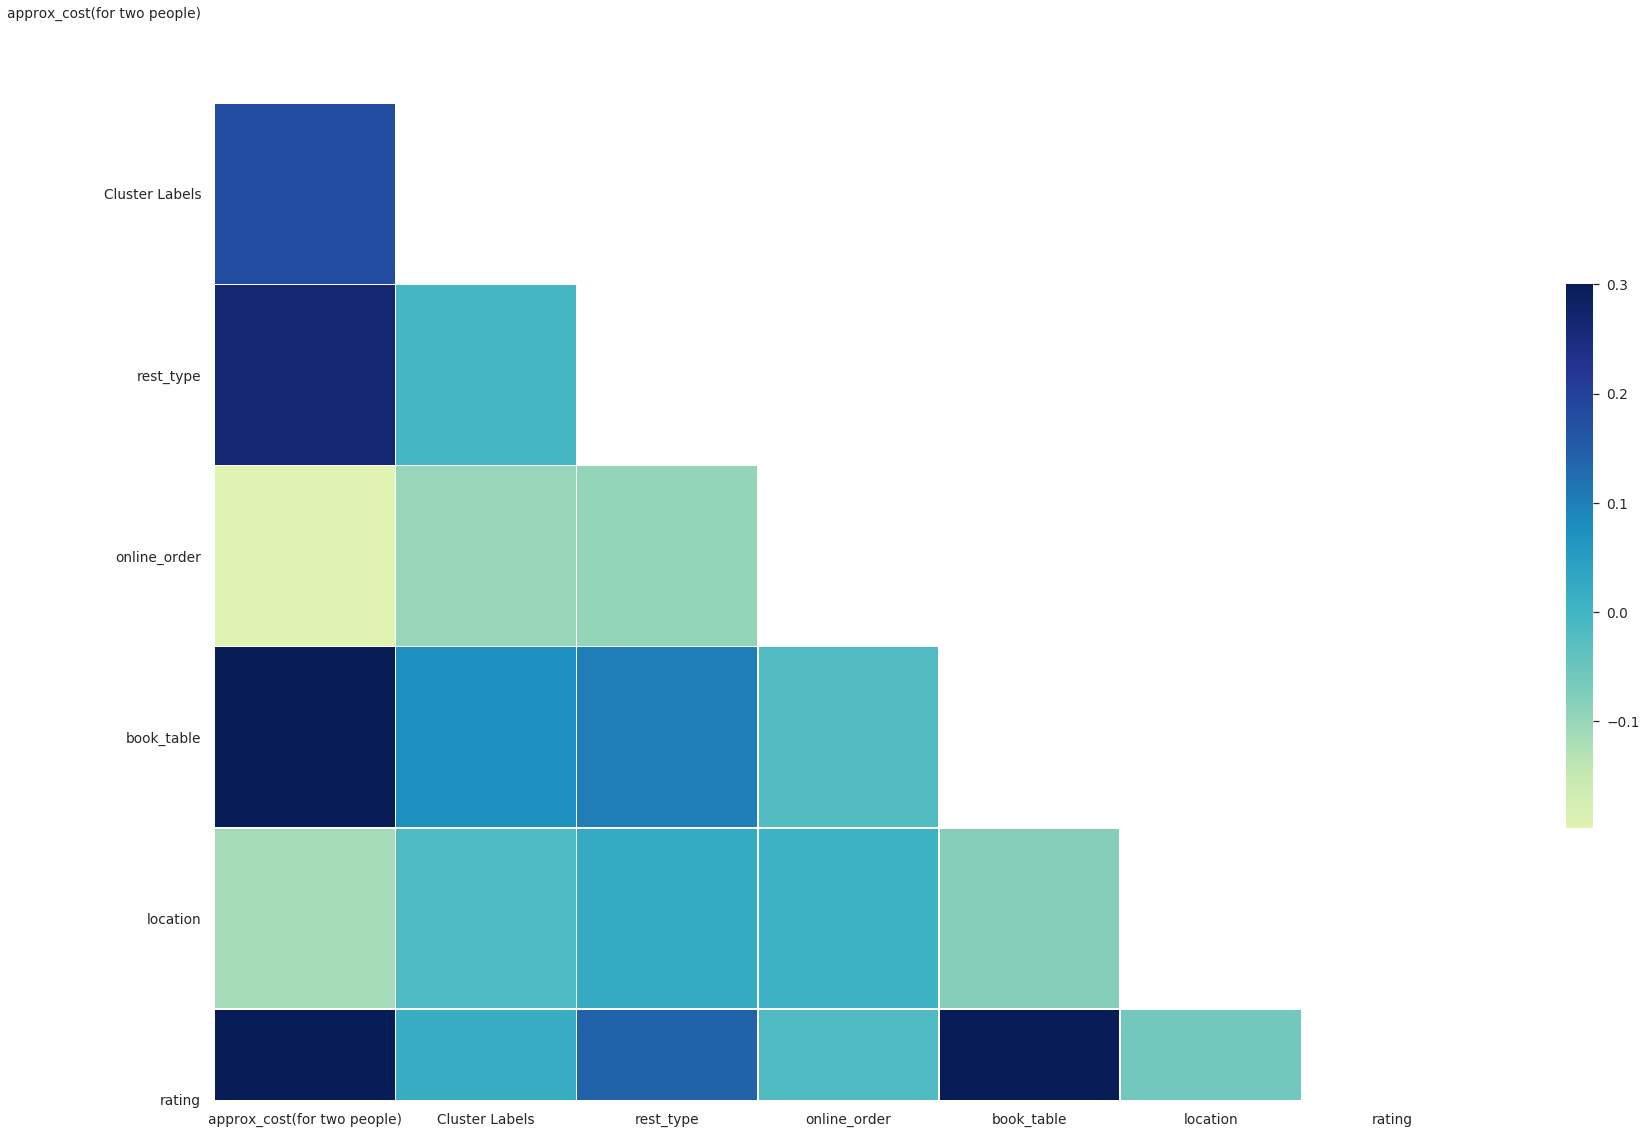

In [77]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white" , font_scale = 1.25)

# Compute the correlation matrix
corr =combined_clean.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(30, 20))

# Draw the heatmap with the mask and correct aspect ratio
sns_plot = sns.heatmap(corr, mask=mask,  vmax=.3,cmap="YlGnBu", center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot_kws={"size": 16})

sns_plot.figure.savefig("corr.jpeg")

#### b) Select data that corelates to Cost for 2 people

In [78]:
cost_cluster = combined_clean.filter(['approx_cost(for two people)','Cluster Labels', 'book_table','rest_type','rating'])
cost_cluster.head()

,approx_cost(for two people),Cluster Labels,book_table,rest_type,rating
0,750,1,0,0,88
1,750,1,0,0,80
2,600,1,0,0,88
3,500,1,1,0,81
4,800,1,0,0,72


#### c) Find corelation and Scatter plots to see the coorelation

In [79]:
cost_cluster[['approx_cost(for two people)', 'rest_type','book_table','rating', 'Cluster Labels']].corr()

,approx_cost(for two people),rest_type,book_table,rating,Cluster Labels
approx_cost(for two people),1.000000,0.265734,0.541169,0.491703,0.177682
rest_type,0.265734,1.000000,0.101779,0.141235,-0.002616
book_table,0.541169,0.101779,1.000000,0.496158,0.075872
rating,0.491703,0.141235,0.496158,1.000000,0.017403
Cluster Labels,0.177682,-0.002616,0.075872,0.017403,1.000000


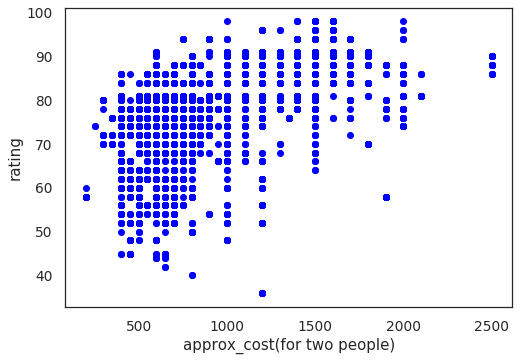

In [80]:
plt.scatter(cost_cluster['approx_cost(for two people)'], cost_cluster['rating'],  color='blue')
plt.xlabel("approx_cost(for two people)")
plt.ylabel("rating")
plt.show()

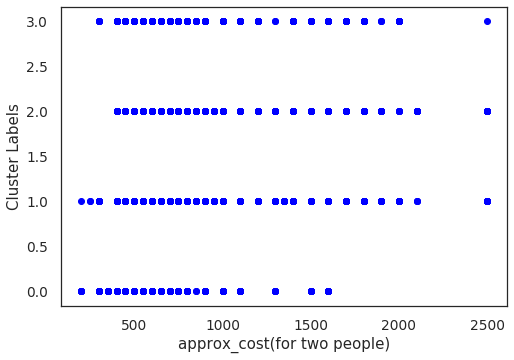

In [81]:
plt.scatter(cost_cluster['approx_cost(for two people)'], cost_cluster['Cluster Labels'],  color='blue')
plt.xlabel("approx_cost(for two people)")
plt.ylabel("Cluster Labels")
plt.show()

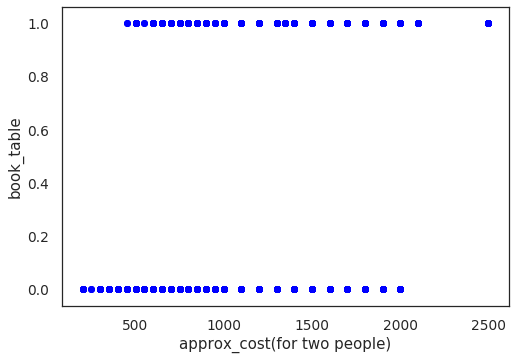

In [82]:
plt.scatter(cost_cluster['approx_cost(for two people)'], cost_cluster['book_table'],  color='blue')
plt.xlabel("approx_cost(for two people)")
plt.ylabel("book_table")
plt.show()

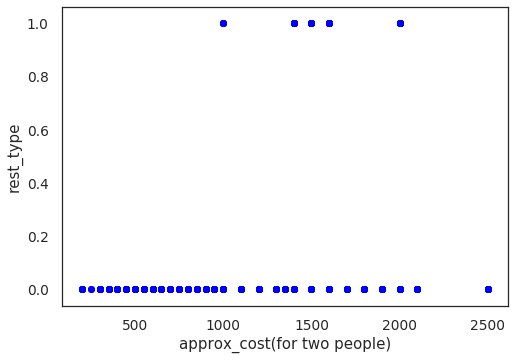

In [83]:
plt.scatter(cost_cluster['approx_cost(for two people)'], cost_cluster['rest_type'],  color='blue')
plt.xlabel("approx_cost(for two people)")
plt.ylabel("rest_type")
plt.show()

<a id='item55'></a>

### 5. Linear regression

In [84]:
from sklearn.linear_model import LinearRegression


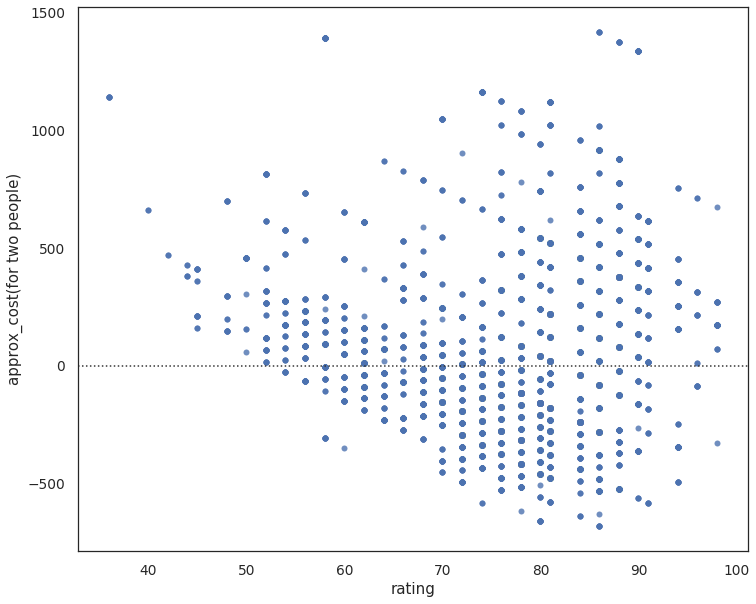

In [85]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(combined_clean['rating'], combined_clean['approx_cost(for two people)'])
plt.show()

In [86]:
Z = combined_clean[['book_table','rest_type','rating','Cluster Labels']]

In [87]:
lm = LinearRegression()
X = combined_clean[['rating']]
Y = combined_clean['approx_cost(for two people)']
lm.fit(X,Y)
Yhat=lm.predict(X)
Yhat[0:5]

array([1122.9121074 ,  958.8389511 , 1122.9121074 ,  979.34809564,
        794.76579481])

In [88]:
lm.fit(Z, cost_cluster['approx_cost(for two people)'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [89]:
Y_hat = lm.predict(Z)

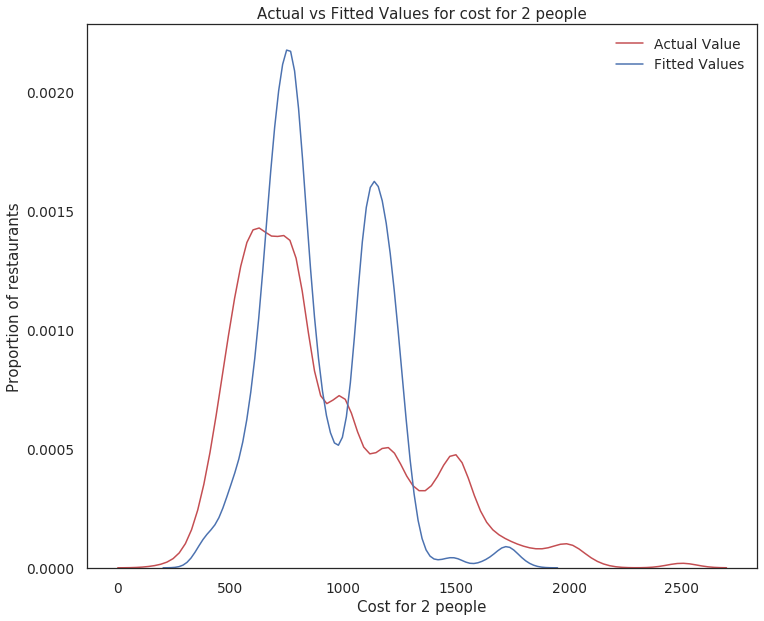

In [90]:
width = 12
height = 10
plt.figure(figsize=(width, height))


ax1 = sns.distplot(cost_cluster['approx_cost(for two people)'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for cost for 2 people')
plt.xlabel('Cost for 2 people')
plt.ylabel('Proportion of restaurants')

plt.show()
plt.close()

<a id='item56'></a>

### 6. Multiple Linear Regression

In [91]:
msk = np.random.rand(len(cost_cluster)) < 0.8
train = cost_cluster[msk]
test = cost_cluster[~msk]

In [92]:
regr = LinearRegression()
x = np.asanyarray(train[['book_table','rest_type','rating','Cluster Labels']])
y = np.asanyarray(train[['approx_cost(for two people)']])
regr.fit (x, y)
print ('Coefficients: ', regr.coef_)
y_= regr.predict(test[['book_table','rest_type','rating','Cluster Labels']])
x = np.asanyarray(test[['book_table','rest_type','rating','Cluster Labels']])
y = np.asanyarray(test[['approx_cost(for two people)']])
print("Residual sum of squares: %.2f"% np.mean((y_ - y) ** 2))
print('Variance score: %.2f' % regr.score(x, y))

Coefficients:  [[293.94966737 539.66540052  11.74099316  75.34337495]]
Residual sum of squares: 88597.90
Variance score: 0.39


<a id='item57'></a>

### 7. Polynomial regression

In [93]:
from sklearn.metrics import r2_score

In [94]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(40, 100, 10)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('approx_cost(for two people)')

    plt.show()
    plt.close()

In [95]:
x = cost_cluster['rating']
y = cost_cluster['approx_cost(for two people)']

In [96]:
# Here we use a polynomial of the 3rd order (cubic) 
f = np.polyfit(x, y, 6)
p = np.poly1d(f)
print(p)

           6             5           4         3       2
2.035e-07 x - 0.0001404 x + 0.03314 x - 3.742 x + 221 x - 6592 x + 7.903e+04


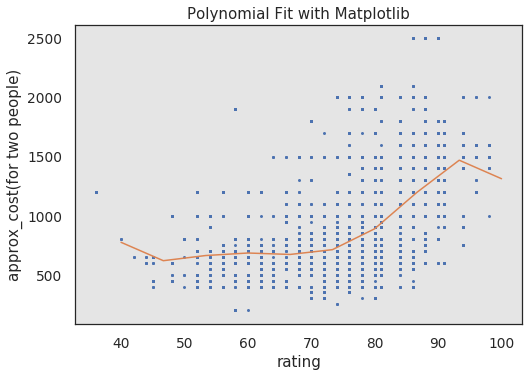

In [97]:
PlotPolly(p, x, y, 'rating')

In [98]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

In [99]:
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)


The R-square value is:  0.3343019178341715


In [100]:
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)

In [101]:
Z_pr=pr.fit_transform(Z)

In [102]:
Z.shape

(7044, 4)

In [103]:
Z_pr.shape

(7044, 15)

## Pipeline

In [104]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [105]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

In [106]:
pipe=Pipeline(Input)
pipe

Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('polynomial', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)), ('model', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

In [107]:
pipe.fit(Z,y)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('polynomial', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)), ('model', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

In [108]:
ypipe=pipe.predict(Z)
ypipe[0:4]

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


array([ 938.375  ,  776.40625,  938.375  , 1049.78125])

<h3>Model 1: Simple Linear Regression</h3>

In [109]:
lm.fit(X, Y)
# Find the R^2
print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.24177174035207638


In [110]:
Yhat=lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [1122.9121074   958.8389511  1122.9121074   979.34809564]


<h3>Model 2: Multiple Linear Regression</h3>

In [111]:
# fit the model 
lm.fit(Z, cost_cluster['approx_cost(for two people)'])
# Find the R^2
print('The R-square is: ', lm.score(Z, combined_clean['approx_cost(for two people)']))

The R-square is:  0.41435986695593974


In [112]:
Y_predict_multifit = lm.predict(Z)

In [113]:
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(combined_clean['approx_cost(for two people)'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  87274.40677737969


<h3>Model 3: Polynomial Fit</h3>

In [114]:
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.3343019178341715


<a id='item58'></a>

### 8. Average cost for 2 person recommendation boxplot

In [115]:
 cost_cluster.head()

,approx_cost(for two people),Cluster Labels,book_table,rest_type,rating
0,750,1,0,0,88
1,750,1,0,0,80
2,600,1,0,0,88
3,500,1,1,0,81
4,800,1,0,0,72


In [116]:
bins = [30,40,50,60,70,80,90]
cost_cluster['binned'] = pd.cut(cost_cluster['rating'], bins)
cost_cluster.head()

,approx_cost(for two people),Cluster Labels,book_table,rest_type,rating,binned
0,750,1,0,0,88,"(80, 90]"
1,750,1,0,0,80,"(70, 80]"
2,600,1,0,0,88,"(80, 90]"
3,500,1,1,0,81,"(80, 90]"
4,800,1,0,0,72,"(70, 80]"


[(250, 2195.0)]

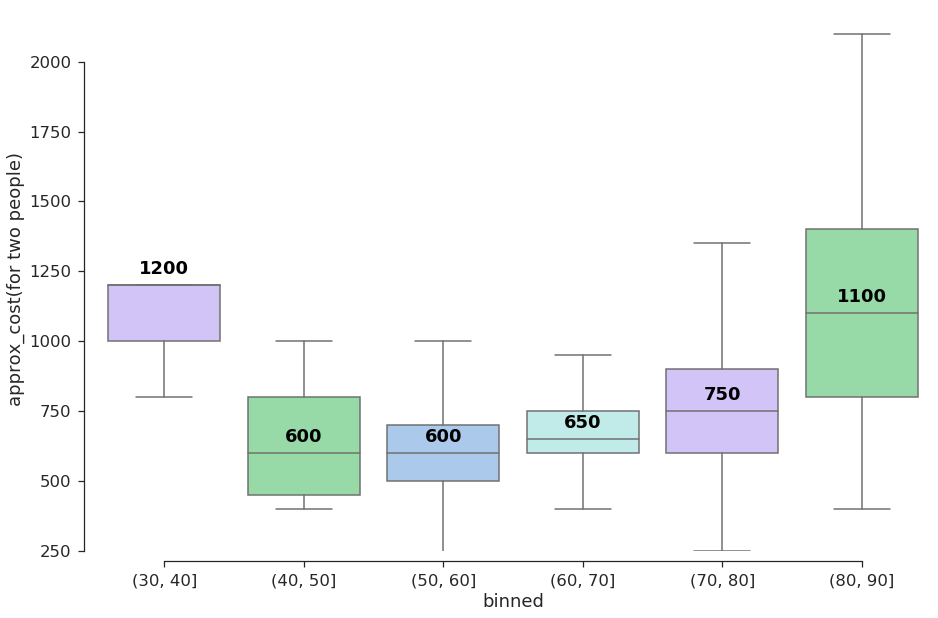

In [117]:
import seaborn as sns
sns.set(style="ticks", palette="pastel" , font_scale = 1.5)
plt.figure(figsize=(15,10))

# Draw a nested boxplot to show bills by day and time
box_plot = sns.boxplot(x="binned", y="approx_cost(for two people)"
            , palette=["m", "g" ,'b','c'],showfliers = False, 
            data= cost_cluster)
sns.despine(offset=10, trim=True)

medians = cost_cluster.groupby(['binned'])['approx_cost(for two people)'].median()
vertical_offset = cost_cluster['approx_cost(for two people)'].median() * 0.05 # offset from median for display

for xtick in box_plot.get_xticks():
    box_plot.text(xtick,medians[xtick] + vertical_offset,medians[xtick], 
            horizontalalignment='center',size='medium',color='black',weight='semibold')

box_plot.set(ylim=(250, None))

<a id='item6'></a>

<a href="#itemA">**RETURN TO TABLE OF CONTENT**</a>

# Conclusion :

#### 1. Based on the top 10 location clustering and Choropleth it is clear that the **CLUSTER II** with 7 locations is the most apt for starting the restaurant.

#### 2. Based on R-square values (maximum of 0.41) of Linear , Multilinear and Polynominal regression it is clear that we do not have enough numercial data to predict a **Approx cost for 2 person**. This also due to the fact that the dataset is majorly categorical data.

#### 3. Due to pint 2. , an average value for **Approx cost for 2 person** is recommended based on the rating that the restaurant earns. The box plot also gives the hint on the min-max values for the same.

#### 4. To facilitate a reliable value prediction further data collection (quantitative) should be organized.

# ----------END OF PROJECT-----------